In [27]:
import pandas as pd
import sklearn
import numpy as np
import datetime
import matplotlib.pyplot as plt
% matplotlib inline
pd.options.display.max_rows = 10

# New-York motor vehicle  collisions 

*Data lies from July 2012 to March 2017. Hereafter, an overview of the data.*

# 1. Motivation

#### *What is your dataset?*

This dataset records all the vehicle collisions that happened in New York since July 2012, until March 2017. One row describes one accident, with a lot of different features: date, time, precise location, borough, vehicle types, causes of the collision, number of people injured or killed and their description (pedestrian, cyclist, etc...).

Our dataset has 1,007,088 rows and 29 features. Hereafter an overview of a couple of rows.

In [28]:
data = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
data[['YEAR']] = data[['DATE']].applymap(lambda x: int(x.split('/')[-1]))
data[['HOUR']] = data[['TIME']].applymap(lambda x: int(x.split(':')[0]))
data[['DATE']] = data[['DATE']].applymap(lambda x: datetime.date(int(x.split('/')[-1]), int(x.split('/')[0]), int(x.split('/')[1])))
indexes_to_drop = data[data['ZIP CODE'] == '     '].index
data=data.drop(indexes_to_drop).fillna(0)
data[['ZIP CODE']] = data[['ZIP CODE']].fillna(0).applymap(lambda x: int(x))
data

C:\Users\Wacim Belblidia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,HOUR
0,2017-03-31,0:00,0,0,40.645615,-73.909900,"(40.645615, -73.9099)",FOSTER AVENUE,0,0,...,0,0,3643404,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,2017,0
1,2017-03-31,0:00,0,0,40.762737,-73.839510,"(40.762737, -73.83951)",0,0,0,...,0,0,3643942,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,0,0,0,2017,0
2,2017-03-31,0:00,BROOKLYN,11203,40.658478,-73.928180,"(40.658478, -73.92818)",EAST 53 STREET,WINTHROP STREET,0,...,0,0,3643587,SPORT UTILITY / STATION WAGON,0,0,0,0,2017,0
3,2017-03-31,0:00,BROOKLYN,11235,40.580360,-73.967610,"(40.58036, -73.96761)",NEPTUNE AVENUE,OCEAN PARKWAY,0,...,0,0,3643847,0,0,0,0,0,2017,0
4,2017-03-31,0:00,0,0,40.845180,-73.914170,"(40.84518, -73.91417)",JEROME AVENUE,0,0,...,0,0,3642657,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007125,2012-07-01,9:45,0,0,0.000000,0.000000,0,0,0,0,...,0,0,2896726,PASSENGER VEHICLE,UNKNOWN,0,0,0,2012,9
1007126,2012-07-01,9:50,MANHATTAN,10019,40.766779,-73.996762,"(40.7667789, -73.9967618)",WEST SIDE HIGHWAY,WEST 50 STREET,0,...,0,0,37635,VAN,SPORT UTILITY / STATION WAGON,0,0,0,2012,9
1007127,2012-07-01,9:50,QUEENS,11001,40.736245,-73.702966,"(40.7362448, -73.7029656)",265 STREET,85 AVENUE,0,...,0,0,219395,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,2012,9
1007128,2012-07-01,9:57,MANHATTAN,10065,40.765242,-73.957868,"(40.7652424, -73.9578679)",1 AVENUE,EAST 68 STREET,0,...,0,0,44907,PASSENGER VEHICLE,TAXI,0,0,0,2012,9


*Here is a comprehensive list of the features:*

In [9]:
print(list(data.columns))

['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


#### *Why did you choose this/these particular dataset(s)?*

We chose this dataset as it was very much suited with geo-localisation analysis and plotting. This dataset also leads to very interesting concrete applications, such as improving emergency processes (NYPD or fire-fighters interventions), bringing up safety conditions at most dangerous crossroads, or providing interesting insights to car insurance companies. 

#### *What was your goal for the end user's experience?*

Our goal for end user's experience is to make readers realize how efficient can our analysis be to suggest improvements on safety conditions in New York. The end user should also be able to interact with our D3 visualization, to be able to visualize on a map any subset of the data he would like to.

# 2. Basic statistics

#### *Choices in data cleaning and preprocessing*

*Data cleaning:*
- Remove unlocated accidents
- Zipcodes of interest: we want to refine our predictions to the zipcode level. Though a lot of zipcodes doesn't include enough accidents to output relevant patterns. We take only the 100th most populated zipcodes (in terms of number of accidents).

*Data preprocessing:*

- Create hour and year columns
- No categorical variables as we didn't use these features in the machine learning
- New indexing: count hours from scratch (July 2012), to be able to take into account the X previous hours in the predictions. For instance, the last point of the data is the 42,333th hour

*The final dataset creation:*
Creation of a new dataset for our machine learning: we want to find, into one ZIPCODE, a correlation between:
- Happening of an accident at the hour H
- The number of accidents of the 6 last hours, and the hour H in itself

To do so, we need to go through the whole history of this zipcode, and output all the 6-hours-in-a-row combinations, with the output. Moreover, the fact that not any accident happen at a given time, is also a valuable information. Data processing to create this dataset is a bit heavy. Hence, we decided to re-index our data with a unique hour count from the beginning of the dataset, so that we can easily retrive the 6 last hours. Hereafter an overview of the final dataset we will run our machine learning on:


In [30]:
def new_indexing(date,hour):
    return (date-initial_date).days*24 + hour

# Nb of zipcodes to extract 
nbzipcodes = 100
initial_date = datetime.date(2012,7,1)
zipcodes_of_interest = list(data.groupby('ZIP CODE').count().sort_values('DATE', ascending=False)[['DATE']].index[:nbzipcodes])[1:]
# zipcodes_of_interest

dataset = data[['DATE', 'TIME', 'HOUR', 'ZIP CODE', 'BOROUGH']]

dataset[['NEW HOUR']] = dataset[['HOUR']]
dataset[['NEW HOUR']] = dataset[['DATE']] - initial_date
dataset[['NEW HOUR']] = dataset[['NEW HOUR']].applymap(lambda x: x.days)
dataset[['NEW HOUR']] = 24*dataset[['NEW HOUR']]
dataset[['NEW HOUR']] = pd.DataFrame(dataset['NEW HOUR'] + dataset['HOUR'])

a = dataset[dataset['ZIP CODE'] == zipcodes_of_interest[0]].groupby('NEW HOUR').count()[[0]].rename(columns={'DATE':'COUNT'})
b = pd.DataFrame(index=range(new_indexing(datetime.date(2017,3,31),23)+1))
c = pd.merge(a,b,how='outer', left_index=True, right_index=True).fillna(int(0))
c[['COUNT']] = c[['COUNT']].applymap(lambda x: int(x))

window_length = 6
columns = ['H-6','H-5','H-4', 'H-3', 'H-2', 'H-1', 'Hour H of the accident ', 'Target']
final = pd.DataFrame(columns = columns)

for line in c.index[window_length:]:
    temp = c.loc[line-window_length:line-1].T
    temp.columns = columns[:-2]
    temp['H'] = line
    temp['Target'] = c.loc[line]
    final = pd.concat([final,temp], axis=0)
final = final.applymap(lambda x:int(x))

final2 = final.reset_index().drop('index', axis=1)
final2[['H']] = final2[['H']].applymap(lambda x: x%24)
final = final2

final

C:\Users\Wacim Belblidia\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


ValueError: ('cannot convert float NaN to integer', 'occurred at index Hour H of the accident ')

#### *Dataset statistics*

Several preliminary statistics has been ran out on the data. Hereafter some basic insights

*Insight 1: Accident repartition regarding neighborhoods*

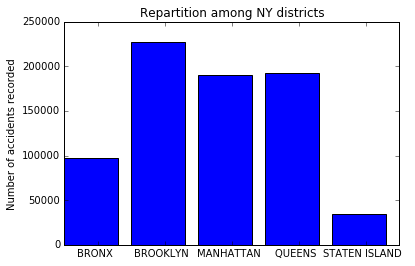

In [7]:
bi = data[pd.notnull(data.BOROUGH)].groupby('BOROUGH').count()[[0]]
plt.bar([i for i in range(len(bi.index))], bi['DATE'])
plt.xticks([i+0.5 for i in [0,1,2,3,4]],[s + '  ' for s in bi.index])
plt.title('Repartition among NY districts')
plt.ylabel('Number of accidents recorded')
plt.show()

*Insight 2: Hour distribution*

Hereafter, an overview on the average amount of accident per hour in NY. This bar plot offers a very good understanding on how the accidents are correlated with the generic "day pattern": accidents are less frequent at night. Peaks occur around 8AM and 5PM, which are the start and end of the workday.

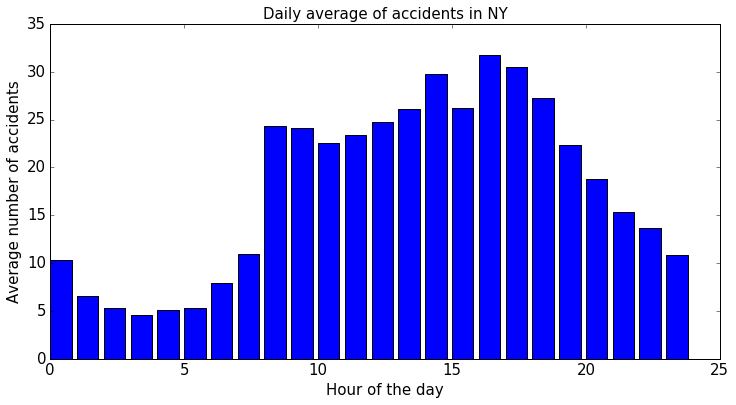

In [18]:
plt.figure(figsize=(12,6))
hour_distribution = data[pd.notnull(data.BOROUGH)].groupby(['HOUR','DATE']).count()[[0]].rename(columns={'DATE':'COUNT'}).reset_index()

hour_distribution = hour_distribution[['HOUR','TIME']].groupby('HOUR').mean()
plt.bar(hour_distribution.index, hour_distribution.TIME)
plt.title('Daily average of accidents in NY', fontsize=15)
plt.xlabel('Hour of the day', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Average number of accidents', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

*Insight 3: Contributing factors*

Here is a quick overview on the accidents' main contributing factors. 

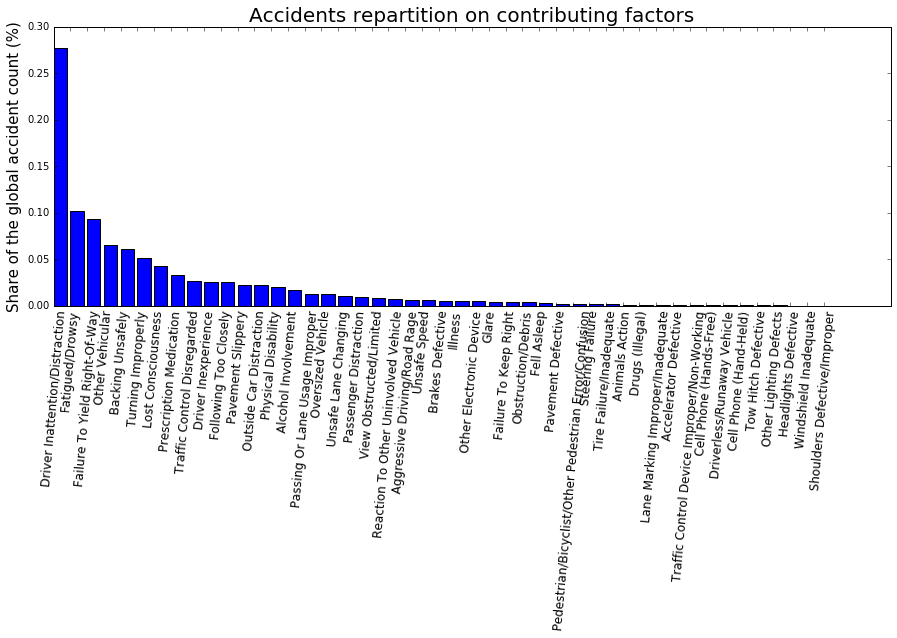

In [17]:
contributing_factors1 = data[['TIME','CONTRIBUTING FACTOR VEHICLE 1']].groupby('CONTRIBUTING FACTOR VEHICLE 1').count().sort_values('TIME',ascending=False)
contributing_factors2 = data[['DATE','CONTRIBUTING FACTOR VEHICLE 2']].groupby('CONTRIBUTING FACTOR VEHICLE 2').count().sort_values('DATE',ascending=False)
contributing_factors = pd.merge(contributing_factors1, contributing_factors2, left_index=True, right_index=True)
contributing_factors = contributing_factors.rename(columns={'TIME':'Factor 1','DATE':'Factor 2'})
contributing_factors.drop('Unspecified',inplace=True)
contributing_factors.sort_values('Factor 1', inplace=True,ascending=False)
contributing_factors = contributing_factors/contributing_factors.sum(axis=0)

plt.figure(figsize=(15, 5))

plt.bar(range(len(contributing_factors.index)),contributing_factors['Factor 1'])
# plt.bar(range(len(contributing_factors.index)),contributing_factors['Factor 2'])

plt.xticks(range(len(contributing_factors.index)),[i.title() for i in contributing_factors.index], rotation = 85,fontsize=12)
plt.title('Accidents repartition on contributing factors',fontsize=20)
plt.ylabel('Share of the global accident count (%)',fontsize=15)
plt.show()

# 3. Theory -- TO UPDATE

#### *Our machine learning tools*

To mention: 
- Classification problem. Several tools available: SVM, LogReg, KNN, RDF, DT, Adaboost + weak classifier, 
- Preprocessing: categorical variable, standardization/scaling, PCA
- Cross validation etc -> higher accuracy for methods XXX and XXX



Models description

- We first tried simple a simple classification model, to assess how difficult this forecasting is. We applied a logistic regression on our preprocessed dataset
- Though, this model is not very efficient. The other classification processes are not doing better (LDA, KNN, RDF). SVM seems to perform a little better. We associated an Adaboost classifier to our SVM model. Results are exposed below. 

[INSERT CROSS VAL SCORE, CONFUSION MATRIX, CLASSIFICATION GRAPH] for both models

#### *Model selection*

- Cross validation, test / train set, balancing of the dataset to have equally spread classe
- Model 1: XXX
- Model 2: XXX



#### *Model performances*

- Cross validation scores and results. Confusion matrix. ROC curve? 
- Results lower than what we expect. Several reasons: not the right features: other features like day of the week, etc? Or data not optimal for this prediction


To assess our model quality, we will compare our model with the random prediction, and the results given by taking just the most-frequent class. 

In [33]:
# Comparison with the random prediction
random_acc = random.rand(...)
most_frequent_acc = ...
print('Accuracy with random prediction: %f' % random_acc = random.rand(...))
print('Accuracy with most-frequent class prediction: %f' % most_frequent_acc)


SyntaxError: keyword can't be an expression (<ipython-input-33-f25fa21e3554>, line 4)

# 4. Visualizations -- TO UPDATE

#### *Description*

#### *The right visualization for our story*

# 5. Discussion -- TO UPDATE

#### *What went well in our project?*
The topic is really interesting since we can easily see a direct practical application. Moreover the visualisation provide a good insight of what is happening troughout an average day in New-York. Finally, the data were complete and well recorded enabling us to produce a good work in machine learning.

#### *Missing elements*